In [1]:
import numpy as np
import os
import xarray as xr
import glob
import matplotlib.pyplot as plt

In [4]:
#-------------------------------------------------
#
#   Shortcut to plot figures
#
#--------------------------------------------------

sy_file_clr = '/edata2/spencer/OE/amsr2_radar/OE_amsr2_cloudsat_final/sy/sy_clear.mtrx'
sy_file_cld = '/edata2/spencer/OE/amsr2_radar/OE_amsr2_cloudsat_final/sy/sy_cloudy.mtrx'
sy_file_prcp = '/edata2/spencer/OE/amsr2_radar/OE_amsr2_cloudsat_final/sy/sy_prcp.mtrx'

nobs = 40

with open(sy_file_clr, 'rb') as f:
    sy_clr = np.fromfile(f, sep='', count=nobs*nobs, dtype='f').reshape(nobs,nobs)
with open(sy_file_cld, 'rb') as f:
    sy_cld = np.fromfile(f, sep='', count=nobs*nobs, dtype='f').reshape(nobs,nobs)
with open(sy_file_prcp, 'rb') as f:
    sy_prcp = np.fromfile(f, sep='', count=nobs*nobs, dtype='f').reshape(nobs,nobs)

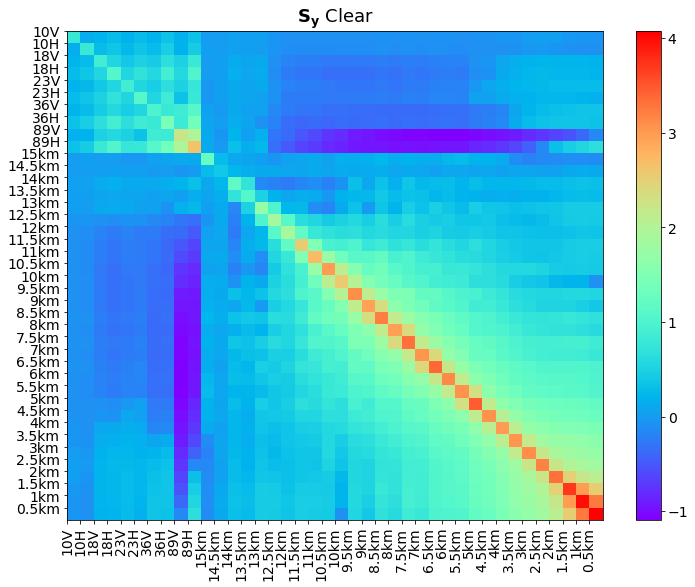

In [38]:



#---Plot using the signed square root of variances:
Sy = sy_clr.copy()

Sy_plt = np.zeros([nobs,nobs])

for i in np.arange(0,nobs):
    for j in np.arange(0,nobs):
        was_neg = False
        el = Sy[i,j]
        if el < 0.:
            el = np.abs(el)
            was_neg = True
        sigma = np.sqrt(el)
        if was_neg:
            sigma = -sigma
            
        Sy_plt[i,j] = sigma
        
labels = ['10V', '10H', '18V', '18H', '23V', '23H', '36V', '36H', '89V', '89H', 
          '15km', '14.5km', '14km', '13.5km' , '13km', '12.5km', '12km', '11.5km', '11km',
          '10.5km', '10km', '9.5km', '9km', '8.5km', '8km', '7.5km', '7km', '6.5km', '6km',
          '5.5km', '5km', '4.5km', '4km', '3.5km', '3km', '2.5km', '2km', '1.5km', '1km',
         '0.5km']

fig, ax = plt.subplots(figsize=[12,9])
im = ax.pcolormesh(Sy_plt, cmap='rainbow')
ax.invert_yaxis()
ax.set_xticks(np.arange(0,Sy.shape[0]), labels, rotation=90, fontsize=14)
#ax.xaxis.tick_top()
ax.set_yticks(np.arange(0,Sy.shape[0]), labels, fontsize=14)
#ax.set_xticks([])
#ax.set_yticks([])
cbar = plt.colorbar(im)
cbar.ax.tick_params(labelsize=14)
plt.title(r'$\mathbf{S_y}$ Clear', fontsize=18)
plt.show()

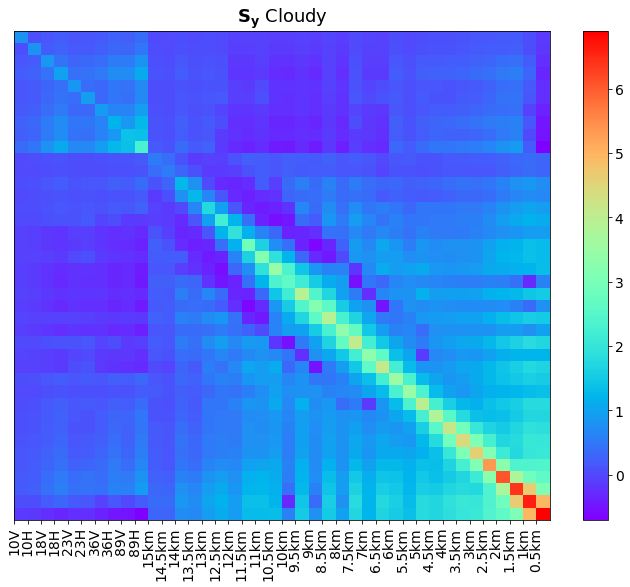

In [48]:
Sy = sy_cld.copy()

Sy_plt = np.zeros([nobs,nobs])

for i in np.arange(0,nobs):
    for j in np.arange(0,nobs):
        was_neg = False
        el = Sy[i,j]
        if el < 0.:
            el = np.abs(el)
            was_neg = True
        sigma = np.sqrt(el)
        if was_neg:
            sigma = -sigma
            
        Sy_plt[i,j] = sigma
        
labels = ['10V', '10H', '18V', '18H', '23V', '23H', '36V', '36H', '89V', '89H', 
          '15km', '14.5km', '14km', '13.5km' , '13km', '12.5km', '12km', '11.5km', '11km',
          '10.5km', '10km', '9.5km', '9km', '8.5km', '8km', '7.5km', '7km', '6.5km', '6km',
          '5.5km', '5km', '4.5km', '4km', '3.5km', '3km', '2.5km', '2km', '1.5km', '1km',
         '0.5km']

fig, ax = plt.subplots(figsize=[12,9])
im = ax.pcolormesh(Sy_plt, cmap='rainbow')
ax.invert_yaxis()
ax.set_xticks(np.arange(0,Sy.shape[0]), labels, rotation=90, fontsize=14)
#ax.xaxis.tick_top()
ax.set_yticks(np.arange(0,Sy.shape[0]), labels, fontsize=14)
#ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(im)
cbar.ax.tick_params(labelsize=14)
plt.title(r'$\mathbf{S_y}$ Cloudy', fontsize=18)
plt.show()

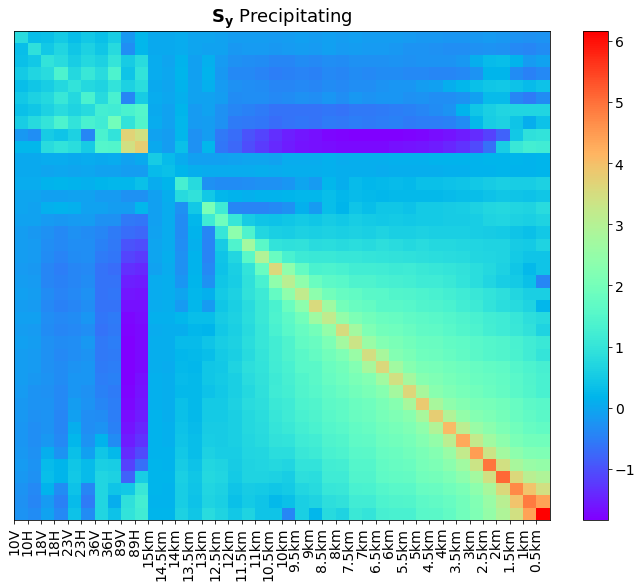

In [49]:
Sy = sy_prcp.copy()

Sy_plt = np.zeros([nobs,nobs])

for i in np.arange(0,nobs):
    for j in np.arange(0,nobs):
        was_neg = False
        el = Sy[i,j]
        if el < 0.:
            el = np.abs(el)
            was_neg = True
        sigma = np.sqrt(el)
        if was_neg:
            sigma = -sigma
            
        Sy_plt[i,j] = sigma
        
labels = ['10V', '10H', '18V', '18H', '23V', '23H', '36V', '36H', '89V', '89H', 
          '15km', '14.5km', '14km', '13.5km' , '13km', '12.5km', '12km', '11.5km', '11km',
          '10.5km', '10km', '9.5km', '9km', '8.5km', '8km', '7.5km', '7km', '6.5km', '6km',
          '5.5km', '5km', '4.5km', '4km', '3.5km', '3km', '2.5km', '2km', '1.5km', '1km',
         '0.5km']

fig, ax = plt.subplots(figsize=[12,9])
im = ax.pcolormesh(Sy_plt, cmap='rainbow')
ax.invert_yaxis()
ax.set_xticks(np.arange(0,Sy.shape[0]), labels, rotation=90, fontsize=14)
#ax.xaxis.tick_top()
ax.set_yticks(np.arange(0,Sy.shape[0]), labels, fontsize=14)
#ax.set_xticks([])
ax.set_yticks([])
cbar = plt.colorbar(im)
cbar.ax.tick_params(labelsize=14)
plt.title(r'$\mathbf{S_y}$ Precipitating', fontsize=18)
plt.show()

In [69]:
#----------------------------------------------------
#
#   CALCULATE Sy - clear air
#
#----------------------------------------------------

#---set latitude bounds for error covariance calculation:
lat_bound1 = -90.
lat_bound2 = -40.
lat_bound3 =  40.
lat_bound4 =  90.

indir = '/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/'

flist = glob.glob(f'{indir}/*native.bin')
flist.sort()

all_tbs = []
all_Z_e = []
all_Z_a = []

all_tbs_r = []
all_Z_e_r = []
all_Z_a_r = []

first = True

for ifile in flist:
    print(ifile)
    
    infile = ifile
    
    fdate = ifile.split('/')[-1].split('_')[3]
    fdate = np.datetime64(f'{fdate[:4]}-{fdate[4:6]}-{fdate[6:]}')
    
#     if fdate > np.datetime64('2015-01-31'):
#         break

    
    with open(infile, 'rb') as f:
        nprofs = np.fromfile(f, sep='', count=1, dtype='i')[0]
        nhgts  = np.fromfile(f, sep='', count=1, dtype='i')[0]
        nlyrs  = nhgts - 1
        lat    = np.fromfile(f, sep='', count=nprofs, dtype='f')
        lon    = np.fromfile(f, sep='', count=nprofs, dtype='f')
        height = np.fromfile(f, sep='', count=nprofs*nhgts, dtype='f').reshape(nhgts,nprofs).T
        temp   = np.fromfile(f, sep='', count=nprofs*nhgts, dtype='f').reshape(nhgts,nprofs).T
        pres   = np.fromfile(f, sep='', count=nprofs*nhgts, dtype='f').reshape(nhgts,nprofs).T
        qlyr   = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        clwc   = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        plwc   = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        tiwc   = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        sst    = np.fromfile(f, sep='', count=nprofs, dtype='f')
        t2m    = np.fromfile(f, sep='', count=nprofs, dtype='f')
        wsp    = np.fromfile(f, sep='', count=nprofs, dtype='f')
        N_0_rain = np.fromfile(f, sep='', count=nprofs, dtype='f')
        mu_rain  = np.fromfile(f, sep='', count=nprofs, dtype='f')
        N_0_snow = np.fromfile(f, sep='', count=nprofs, dtype='f')
        rho_snow = np.fromfile(f, sep='', count=nprofs, dtype='f')
        
    #Exclude raining or cloudy data:
    clear_profs = np.where(np.all(clwc < 1.0e-06, axis=1))[0]
    lat         = lat[clear_profs]
    lon         = lon[clear_profs]
        
        
    #Clear memory from variables we don't need:
    height   = []
    temp     = []
    pres     = []
    qlyr     = []
    clwc     = []
    plwc     = []
    tiwc     = []
    sst      = []
    t2m      = []
    wsp      = []
    N_0_rain = []
    mu_rain  = []
    N_0_snow = []
    rho_snow = []
    
    #Exclude data from outside latitude bounds:
    within_sh_box = np.logical_and(lat >= lat_bound1, lat <= lat_bound2)
    within_nh_box = np.logical_and(lat >= lat_bound3, lat <= lat_bound4)
    in_either     = np.logical_or(within_sh_box, within_nh_box)
    within_bounds = np.where(in_either)
    
    
    lat = lat[within_bounds]
    lon = lon[within_bounds]
    
    
    #---Read in simulated obs:
    obs_file = f'{infile[:-4]}_simobs.bin'
    
    with open(obs_file, 'rb') as f:
        nprofs_obs = np.fromfile(f, sep='', count=1, dtype='i')[0]
        if nprofs_obs != nprofs: #something wrong
            raise ValueError(f'Number of profiles {nprofs_obs} != {nprofs}.')
        nchans = np.fromfile(f, sep='', count=1, dtype='i')[0]
        nlyrs  = np.fromfile(f, sep='', count=1, dtype='i')[0]
        tbs    = np.fromfile(f, sep='', count=nprofs*nchans, dtype='f').reshape(nchans,nprofs).T
        Z_e    = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        Z_a    = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        
        
    tbs = tbs[clear_profs]
    Z_e = Z_e[clear_profs]
    Z_a = Z_a[clear_profs]
    
        
    tbs = tbs[within_bounds]
    Z_e = Z_e[within_bounds]
    Z_a = Z_a[within_bounds]
    
        
    #---Read in retrieval resolution file:
    infile_r = f'{ifile[:-10]}retr.bin'
    
    with open(infile_r, 'rb') as f:
        nprofs_r   = np.fromfile(f, sep='', count=1, dtype='i')[0]
        nhgts      = np.fromfile(f, sep='', count=1, dtype='i')[0]
        nlyrs      = nhgts - 1
        lat_r      = np.fromfile(f, sep='', count=nprofs, dtype='f')
        lon_r      = np.fromfile(f, sep='', count=nprofs, dtype='f')
        height_r   = np.fromfile(f, sep='', count=nprofs*nhgts, dtype='f').reshape(nhgts,nprofs).T
        temp_r     = np.fromfile(f, sep='', count=nprofs*nhgts, dtype='f').reshape(nhgts,nprofs).T
        pres_r     = np.fromfile(f, sep='', count=nprofs*nhgts, dtype='f').reshape(nhgts,nprofs).T
        qlyr_r     = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        clwc_r     = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        plwc_r     = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        tiwc_r     = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        sst        = np.fromfile(f, sep='', count=nprofs, dtype='f')
        t2m        = np.fromfile(f, sep='', count=nprofs, dtype='f')
        wsp        = np.fromfile(f, sep='', count=nprofs, dtype='f')
        N_0_rain_r = np.fromfile(f, sep='', count=nprofs, dtype='f')
        mu_rain    = np.fromfile(f, sep='', count=nprofs, dtype='f')
        N_0_snow_r = np.fromfile(f, sep='', count=nprofs, dtype='f')
        rho_snow_r = np.fromfile(f, sep='', count=nprofs, dtype='f')
    
        
    #Clear memory from variables we don't need:
    height_r   = []
    temp_r     = []
    pres_r     = []
    qlyr_r     = []
    clwc_r     = []
    plwc_r     = []
    tiwc_r     = []
    sst        = []
    t2m        = []
    wsp        = []
    N_0_rain_r = []
    mu_rain    = []
    N_0_snow_r = []
    rho_snow_r = []
    
    if nprofs_r != nprofs:
        raise ValueError(f'Number of profiles {nprofs_obs} != {nprofs}.')
        
    lat_r = lat_r[clear_profs]
    lon_r = lon_r[clear_profs]
        
    lat_r = lat_r[within_bounds]
    lon_r = lon_r[within_bounds]
    
    if np.any(lat_r != lat):
        raise ValueError(f'Lat arrays are not the same!')
    
    
    #---Read in retrieval resolution simulated obs:
    obs_file_r = f'{infile_r[:-4]}_simobs.bin'
    
    with open(obs_file_r, 'rb') as f:
        nprofs_obs_r = np.fromfile(f, sep='', count=1, dtype='i')[0]
        if nprofs_obs_r != nprofs: #something wrong
            raise ValueError(f'Number of profiles {nprofs_obs} != {nprofs}.')
        nchans = np.fromfile(f, sep='', count=1, dtype='i')[0]
        nlyrs  = np.fromfile(f, sep='', count=1, dtype='i')[0]
        tbs_r    = np.fromfile(f, sep='', count=nprofs*nchans, dtype='f').reshape(nchans,nprofs).T
        Z_e_r    = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        Z_a_r    = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        
    tbs_r = tbs_r[clear_profs]
    Z_e_r = Z_e_r[clear_profs]
    Z_a_r = Z_a_r[clear_profs]
    
    tbs_r = tbs_r[within_bounds]
    Z_e_r = Z_e_r[within_bounds]
    Z_a_r = Z_a_r[within_bounds]
    
    if first:
        all_tbs = tbs
        all_Z_e = Z_e
        all_Z_a = Z_a
        
        all_tbs_r = tbs_r
        all_Z_e_r = Z_e_r
        all_Z_a_r = Z_a_r
        
        first = False
        
    else:
        all_tbs = np.concatenate((all_tbs, tbs), axis=0)
        all_Z_e = np.concatenate((all_Z_e, Z_e), axis=0)
        all_Z_a = np.concatenate((all_Z_a, Z_a), axis=0)
    
        all_tbs_r = np.concatenate((all_tbs_r, tbs_r), axis=0)
        all_Z_e_r = np.concatenate((all_Z_e_r, Z_e_r), axis=0)
        all_Z_a_r = np.concatenate((all_Z_a_r, Z_a_r), axis=0)
        

    
ntotprofs = all_tbs.shape[0]
simobs   = np.zeros([ntotprofs, nchans+nlyrs], dtype='f')
simobs_r = np.zeros([ntotprofs, nchans+nlyrs], dtype='f')
simobs[:,:nchans]   = all_tbs
simobs[:,nchans:]   = all_Z_a
simobs_r[:,:nchans] = all_tbs_r
simobs_r[:,nchans:] = all_Z_a_r

print('Total profiles in statistics: ', ntotprofs)

#Remove nans:
#Check native first
bad_obs  = np.where(np.isnan(simobs))[0]
simobs   = np.delete(simobs, bad_obs, axis=0)
simobs_r = np.delete(simobs_r, bad_obs, axis=0)
#lat      = np.delete(lat, bad_obs)

print('number of bad obs, native: ', bad_obs.size)

bad_obs  = np.where(np.isnan(simobs_r))[0]
simobs   = np.delete(simobs, bad_obs, axis=0)
simobs_r = np.delete(simobs_r, bad_obs, axis=0)
#lat      = np.delete(lat, bad_obs)

print('number of bad obs, retr: ', bad_obs.size)

obs_error = simobs_r - simobs

Sy = np.cov(obs_error, rowvar=False)

#---Add NEDT (K) to diagonal elements of Sy:
Sy[0,0] = Sy[0,0] + 0.6    #10V
Sy[1,1] = Sy[1,1] + 0.6    #10H
Sy[2,2] = Sy[2,2] + 0.6    #18V
Sy[3,3] = Sy[3,3] + 0.6    #18H
Sy[4,4] = Sy[4,4] + 0.6    #23V
Sy[5,5] = Sy[5,5] + 0.6    #23H
Sy[6,6] = Sy[6,6] + 0.6    #36V
Sy[7,7] = Sy[7,7] + 0.6    #36H
Sy[8,8] = Sy[8,8] + 1.1    #89V
Sy[9,9] = Sy[9,9] + 1.1    #89H

/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150101_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150103_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150104_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150105_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150106_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150107_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150108_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150109_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150110_native.bin
/edata2/spencer/the

/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150717_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150718_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150719_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150720_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150721_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150722_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150723_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150724_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150725_native.bin
/edata2/spencer/the

In [70]:
Sy_clear = Sy.copy()

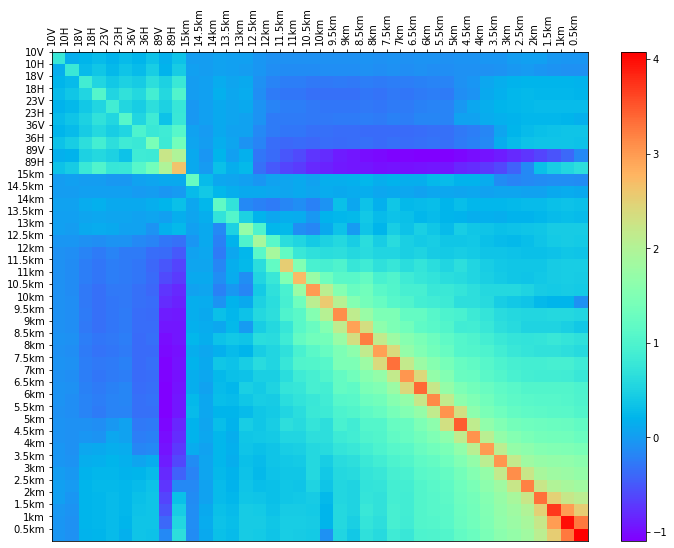

In [71]:
#---Plot using the signed square root of variances:
Sy_plt = np.zeros(Sy.shape)

for i in np.arange(0,Sy.shape[0]):
    for j in np.arange(0,Sy.shape[0]):
        was_neg = False
        el = Sy_clear[i,j]
        if el < 0.:
            el = np.abs(el)
            was_neg = True
        sigma = np.sqrt(el)
        if was_neg:
            sigma = -sigma
            
        Sy_plt[i,j] = sigma
        
labels = ['10V', '10H', '18V', '18H', '23V', '23H', '36V', '36H', '89V', '89H', 
          '15km', '14.5km', '14km', '13.5km' , '13km', '12.5km', '12km', '11.5km', '11km',
          '10.5km', '10km', '9.5km', '9km', '8.5km', '8km', '7.5km', '7km', '6.5km', '6km',
          '5.5km', '5km', '4.5km', '4km', '3.5km', '3km', '2.5km', '2km', '1.5km', '1km',
         '0.5km']

fig, ax = plt.subplots(figsize=[12,9])
im = ax.pcolormesh(Sy_plt, cmap='rainbow')
ax.invert_yaxis()
ax.set_xticks(np.arange(0,Sy.shape[0]), labels, rotation=90)
ax.xaxis.tick_top()
ax.set_yticks(np.arange(0,Sy.shape[0]), labels)
plt.colorbar(im)
plt.show()

In [17]:
#---Write out clear-air Sy:

Sy_file = '/edata2/spencer/OE/amsr2_radar/OE_amsr2_radar/sy/sy_clear.mtrx'

with open(Sy_file, 'wb') as f:
    Sy_clear.astype('f').T.tofile(f, sep='', format='unformatted')

In [72]:
#---clear-air Sy with no radar:
Sy_clear_noradar = Sy_clear.copy()

for i in np.arange(0, Sy.shape[0]):
    for j in np.arange(0, Sy.shape[0]):
        if i >= 10 or j >= 10:
            if i == j:
                Sy_clear_noradar[i,j] = 1000.
            else:
                Sy_clear_noradar[i,j] = 0.



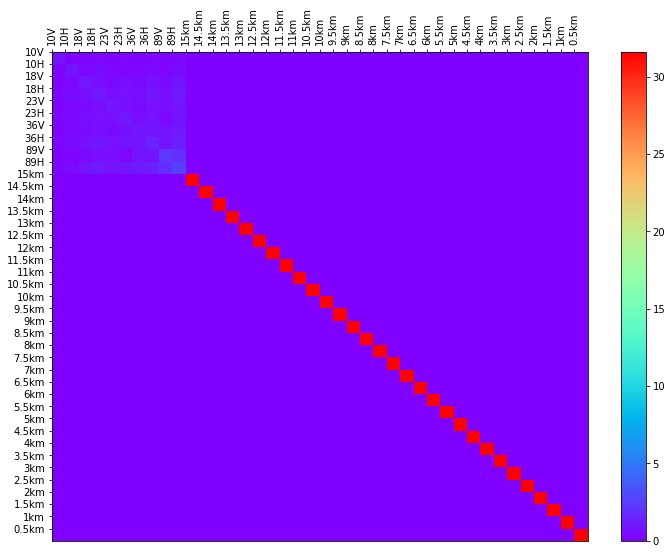

In [73]:
#---Plot using the signed square root of variances:
Sy_plt = np.zeros(Sy.shape)

for i in np.arange(0,Sy.shape[0]):
    for j in np.arange(0,Sy.shape[0]):
        was_neg = False
        el = Sy_clear_noradar[i,j]
        if el < 0.:
            el = np.abs(el)
            was_neg = True
        sigma = np.sqrt(el)
        if was_neg:
            sigma = -sigma
            
        Sy_plt[i,j] = sigma
        
labels = ['10V', '10H', '18V', '18H', '23V', '23H', '36V', '36H', '89V', '89H', 
          '15km', '14.5km', '14km', '13.5km' , '13km', '12.5km', '12km', '11.5km', '11km',
          '10.5km', '10km', '9.5km', '9km', '8.5km', '8km', '7.5km', '7km', '6.5km', '6km',
          '5.5km', '5km', '4.5km', '4km', '3.5km', '3km', '2.5km', '2km', '1.5km', '1km',
         '0.5km']

fig, ax = plt.subplots(figsize=[12,9])
im = ax.pcolormesh(Sy_plt, cmap='rainbow')
ax.invert_yaxis()
ax.set_xticks(np.arange(0,Sy.shape[0]), labels, rotation=90)
ax.xaxis.tick_top()
ax.set_yticks(np.arange(0,Sy.shape[0]), labels)
plt.colorbar(im)
plt.show()

In [75]:
#Write out clear with no radar:

Sy_file_noradar = '/edata2/spencer/OE/amsr2_radar/OE_amsr2_radar_clear/sy/sy_clear_noradar.mtrx'

with open(Sy_file_noradar, 'wb') as f:
    Sy_clear_noradar.astype('f').T.tofile(f, sep='', format='unformatted')

In [61]:
#----------------------------------------------------
#
#   CALCULATE Sy - cloudy
#
#----------------------------------------------------

#---set latitude bounds for error covariance calculation:
lat_bound1 = -90.
lat_bound2 = -40.
lat_bound3 =  40.
lat_bound4 =  90.

indir = '/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/'

flist = glob.glob(f'{indir}/*native.bin')
flist.sort()

all_tbs = []
all_Z_e = []
all_Z_a = []

all_tbs_r = []
all_Z_e_r = []
all_Z_a_r = []

first = True

for ifile in flist:
    print(ifile)
    
    infile = ifile
    
    fdate = ifile.split('/')[-1].split('_')[3]
    fdate = np.datetime64(f'{fdate[:4]}-{fdate[4:6]}-{fdate[6:]}')
    
#     if fdate > np.datetime64('2015-01-31'):
#         break

    
    with open(infile, 'rb') as f:
        nprofs = np.fromfile(f, sep='', count=1, dtype='i')[0]
        nhgts  = np.fromfile(f, sep='', count=1, dtype='i')[0]
        nlyrs  = nhgts - 1
        lat    = np.fromfile(f, sep='', count=nprofs, dtype='f')
        lon    = np.fromfile(f, sep='', count=nprofs, dtype='f')
        height = np.fromfile(f, sep='', count=nprofs*nhgts, dtype='f').reshape(nhgts,nprofs).T
        temp   = np.fromfile(f, sep='', count=nprofs*nhgts, dtype='f').reshape(nhgts,nprofs).T
        pres   = np.fromfile(f, sep='', count=nprofs*nhgts, dtype='f').reshape(nhgts,nprofs).T
        qlyr   = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        clwc   = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        plwc   = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        tiwc   = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        sst    = np.fromfile(f, sep='', count=nprofs, dtype='f')
        t2m    = np.fromfile(f, sep='', count=nprofs, dtype='f')
        wsp    = np.fromfile(f, sep='', count=nprofs, dtype='f')
        N_0_rain = np.fromfile(f, sep='', count=nprofs, dtype='f')
        mu_rain  = np.fromfile(f, sep='', count=nprofs, dtype='f')
        N_0_snow = np.fromfile(f, sep='', count=nprofs, dtype='f')
        rho_snow = np.fromfile(f, sep='', count=nprofs, dtype='f')
        
    #---Read in simulated obs:
    obs_file = f'{infile[:-4]}_simobs.bin'
    
    with open(obs_file, 'rb') as f:
        nprofs_obs = np.fromfile(f, sep='', count=1, dtype='i')[0]
        if nprofs_obs != nprofs: #something wrong
            raise ValueError(f'Number of profiles {nprofs_obs} != {nprofs}.')
        nchans = np.fromfile(f, sep='', count=1, dtype='i')[0]
        nlyrs  = np.fromfile(f, sep='', count=1, dtype='i')[0]
        tbs    = np.fromfile(f, sep='', count=nprofs*nchans, dtype='f').reshape(nchans,nprofs).T
        Z_e    = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        Z_a    = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        
        
    #Get only cloudy profiles:
    cloudy = []
    
    for iprof in np.arange(0,nprofs):

        cloud = clwc[iprof]
        rain  = plwc[iprof]
        ice   = tiwc[iprof]

        t = temp[iprof]

        z_eff = Z_e[iprof]

        if np.any(rain > 1.0e-06):
            continue #Don't want raining profiles

        if np.all(z_eff <= -26.): 
            continue #Don't want clear profiles

        frzlvlbin = np.where(t <= 273.15)[0][-1]

        if np.any(z_eff[:frzlvlbin] > -15.):
            continue #Don't want snow sized particles
        
        
        cloudy = np.append(cloudy, iprof)
        
    cloudy = cloudy.astype('i')
        
    #Exclude raining or clear data:
    lat         = lat[cloudy]
    lon         = lon[cloudy]
        
        
    #Clear memory from variables we don't need:
    height   = []
    temp     = []
    pres     = []
    qlyr     = []
    clwc     = []
    plwc     = []
    tiwc     = []
    sst      = []
    t2m      = []
    wsp      = []
    N_0_rain = []
    mu_rain  = []
    N_0_snow = []
    rho_snow = []
    
    #Exclude data from outside latitude bounds:
    within_sh_box = np.logical_and(lat >= lat_bound1, lat <= lat_bound2)
    within_nh_box = np.logical_and(lat >= lat_bound3, lat <= lat_bound4)
    in_either     = np.logical_or(within_sh_box, within_nh_box)
    within_bounds = np.where(in_either)
    
    
    lat = lat[within_bounds]
    lon = lon[within_bounds]
        
        
    tbs = tbs[cloudy]
    Z_e = Z_e[cloudy]
    Z_a = Z_a[cloudy]
    
        
    tbs = tbs[within_bounds]
    Z_e = Z_e[within_bounds]
    Z_a = Z_a[within_bounds]
    
        
    #---Read in retrieval resolution file:
    infile_r = f'{ifile[:-10]}retr.bin'
    
    with open(infile_r, 'rb') as f:
        nprofs_r   = np.fromfile(f, sep='', count=1, dtype='i')[0]
        nhgts      = np.fromfile(f, sep='', count=1, dtype='i')[0]
        nlyrs      = nhgts - 1
        lat_r      = np.fromfile(f, sep='', count=nprofs, dtype='f')
        lon_r      = np.fromfile(f, sep='', count=nprofs, dtype='f')
        height_r   = np.fromfile(f, sep='', count=nprofs*nhgts, dtype='f').reshape(nhgts,nprofs).T
        temp_r     = np.fromfile(f, sep='', count=nprofs*nhgts, dtype='f').reshape(nhgts,nprofs).T
        pres_r     = np.fromfile(f, sep='', count=nprofs*nhgts, dtype='f').reshape(nhgts,nprofs).T
        qlyr_r     = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        clwc_r     = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        plwc_r     = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        tiwc_r     = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        sst        = np.fromfile(f, sep='', count=nprofs, dtype='f')
        t2m        = np.fromfile(f, sep='', count=nprofs, dtype='f')
        wsp        = np.fromfile(f, sep='', count=nprofs, dtype='f')
        N_0_rain_r = np.fromfile(f, sep='', count=nprofs, dtype='f')
        mu_rain    = np.fromfile(f, sep='', count=nprofs, dtype='f')
        N_0_snow_r = np.fromfile(f, sep='', count=nprofs, dtype='f')
        rho_snow_r = np.fromfile(f, sep='', count=nprofs, dtype='f')
    
        
    #Clear memory from variables we don't need:
    height_r   = []
    temp_r     = []
    pres_r     = []
    qlyr_r     = []
    clwc_r     = []
    plwc_r     = []
    tiwc_r     = []
    sst        = []
    t2m        = []
    wsp        = []
    N_0_rain_r = []
    mu_rain    = []
    N_0_snow_r = []
    rho_snow_r = []
    
    if nprofs_r != nprofs:
        raise ValueError(f'Number of profiles {nprofs_obs} != {nprofs}.')
        
    lat_r = lat_r[cloudy]
    lon_r = lon_r[cloudy]
        
    lat_r = lat_r[within_bounds]
    lon_r = lon_r[within_bounds]
    
    if np.any(lat_r != lat):
        raise ValueError(f'Lat arrays are not the same!')
    
    
    #---Read in retrieval resolution simulated obs:
    obs_file_r = f'{infile_r[:-4]}_simobs.bin'
    
    with open(obs_file_r, 'rb') as f:
        nprofs_obs_r = np.fromfile(f, sep='', count=1, dtype='i')[0]
        if nprofs_obs_r != nprofs: #something wrong
            raise ValueError(f'Number of profiles {nprofs_obs} != {nprofs}.')
        nchans = np.fromfile(f, sep='', count=1, dtype='i')[0]
        nlyrs  = np.fromfile(f, sep='', count=1, dtype='i')[0]
        tbs_r    = np.fromfile(f, sep='', count=nprofs*nchans, dtype='f').reshape(nchans,nprofs).T
        Z_e_r    = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        Z_a_r    = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        
    tbs_r = tbs_r[cloudy]
    Z_e_r = Z_e_r[cloudy]
    Z_a_r = Z_a_r[cloudy]
    
    tbs_r = tbs_r[within_bounds]
    Z_e_r = Z_e_r[within_bounds]
    Z_a_r = Z_a_r[within_bounds]
    
    if first:
        all_tbs = tbs
        all_Z_e = Z_e
        all_Z_a = Z_a
        
        all_tbs_r = tbs_r
        all_Z_e_r = Z_e_r
        all_Z_a_r = Z_a_r
        
        first = False
        
    else:
        all_tbs = np.concatenate((all_tbs, tbs), axis=0)
        all_Z_e = np.concatenate((all_Z_e, Z_e), axis=0)
        all_Z_a = np.concatenate((all_Z_a, Z_a), axis=0)
    
        all_tbs_r = np.concatenate((all_tbs_r, tbs_r), axis=0)
        all_Z_e_r = np.concatenate((all_Z_e_r, Z_e_r), axis=0)
        all_Z_a_r = np.concatenate((all_Z_a_r, Z_a_r), axis=0)
        

    
ntotprofs = all_tbs.shape[0]
simobs   = np.zeros([ntotprofs, nchans+nlyrs], dtype='f')
simobs_r = np.zeros([ntotprofs, nchans+nlyrs], dtype='f')
simobs[:,:nchans]   = all_tbs
simobs[:,nchans:]   = all_Z_a
simobs_r[:,:nchans] = all_tbs_r
simobs_r[:,nchans:] = all_Z_a_r

print('Total profiles in statistics: ', ntotprofs)

#Remove nans:
#Check native first
bad_obs  = np.where(np.isnan(simobs))[0]
simobs   = np.delete(simobs, bad_obs, axis=0)
simobs_r = np.delete(simobs_r, bad_obs, axis=0)
#lat      = np.delete(lat, bad_obs)

print('number of bad obs, native: ', bad_obs.size)

bad_obs  = np.where(np.isnan(simobs_r))[0]
simobs   = np.delete(simobs, bad_obs, axis=0)
simobs_r = np.delete(simobs_r, bad_obs, axis=0)
#lat      = np.delete(lat, bad_obs)

print('number of bad obs, retr: ', bad_obs.size)

obs_error = simobs_r - simobs

Sy = np.cov(obs_error, rowvar=False)

#---Add NEDT (K) to diagonal elements of Sy:
Sy[0,0] = Sy[0,0] + 0.6    #10V
Sy[1,1] = Sy[1,1] + 0.6    #10H
Sy[2,2] = Sy[2,2] + 0.6    #18V
Sy[3,3] = Sy[3,3] + 0.6    #18H
Sy[4,4] = Sy[4,4] + 0.6    #23V
Sy[5,5] = Sy[5,5] + 0.6    #23H
Sy[6,6] = Sy[6,6] + 0.6    #36V
Sy[7,7] = Sy[7,7] + 0.6    #36H
Sy[8,8] = Sy[8,8] + 1.1    #89V
Sy[9,9] = Sy[9,9] + 1.1    #89H

/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150101_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150103_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150104_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150105_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150106_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150107_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150108_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150109_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150110_native.bin
/edata2/spencer/the

/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150717_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150718_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150719_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150720_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150721_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150722_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150723_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150724_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150725_native.bin
/edata2/spencer/the

In [62]:
Sy_cloudy = Sy.copy()

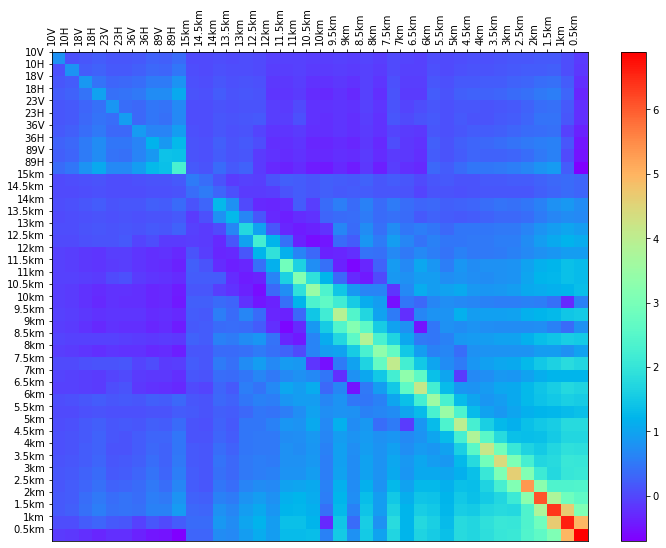

In [64]:
#---Plot using the signed square root of variances:
Sy_plt = np.zeros(Sy.shape)

for i in np.arange(0,Sy.shape[0]):
    for j in np.arange(0,Sy.shape[0]):
        was_neg = False
        el = Sy_cloudy[i,j]
        if el < 0.:
            el = np.abs(el)
            was_neg = True
        sigma = np.sqrt(el)
        if was_neg:
            sigma = -sigma
            
        Sy_plt[i,j] = sigma
        
labels = ['10V', '10H', '18V', '18H', '23V', '23H', '36V', '36H', '89V', '89H', 
          '15km', '14.5km', '14km', '13.5km' , '13km', '12.5km', '12km', '11.5km', '11km',
          '10.5km', '10km', '9.5km', '9km', '8.5km', '8km', '7.5km', '7km', '6.5km', '6km',
          '5.5km', '5km', '4.5km', '4km', '3.5km', '3km', '2.5km', '2km', '1.5km', '1km',
         '0.5km']

fig, ax = plt.subplots(figsize=[12,9])
im = ax.pcolormesh(Sy_plt, cmap='rainbow')
ax.invert_yaxis()
ax.set_xticks(np.arange(0,Sy.shape[0]), labels, rotation=90)
ax.xaxis.tick_top()
ax.set_yticks(np.arange(0,Sy.shape[0]), labels)
plt.colorbar(im)
plt.show()

In [82]:
#---Write out cloudy Sy:

Sy_file = '/edata2/spencer/OE/amsr2_radar/OE_amsr2_radar_cloudy/sy/sy_cloudy.mtrx'

with open(Sy_file, 'wb') as f:
    Sy_cloudy.astype('f').T.tofile(f, sep='', format='unformatted')

In [78]:
#---Create Sy_cloudy with no radar:

Sy_cloudy_noradar = Sy_cloudy.copy()

for i in np.arange(0, Sy.shape[0]):
    for j in np.arange(0, Sy.shape[0]):
        if i >= 10 or j >= 10:
            if i == j:
                Sy_cloudy_noradar[i,j] = 1000.
            else:
                Sy_cloudy_noradar[i,j] = 0.

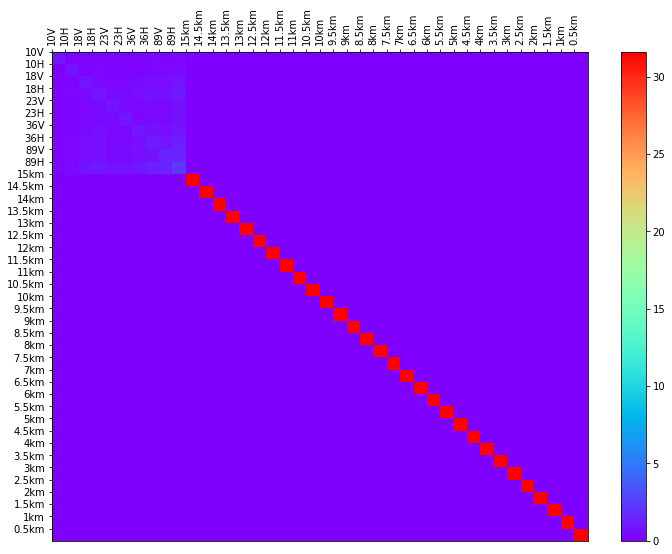

In [79]:
Sy_plt = np.zeros(Sy.shape)

for i in np.arange(0,Sy.shape[0]):
    for j in np.arange(0,Sy.shape[0]):
        was_neg = False
        el = Sy_cloudy_noradar[i,j]
        if el < 0.:
            el = np.abs(el)
            was_neg = True
        sigma = np.sqrt(el)
        if was_neg:
            sigma = -sigma
            
        Sy_plt[i,j] = sigma
        
labels = ['10V', '10H', '18V', '18H', '23V', '23H', '36V', '36H', '89V', '89H', 
          '15km', '14.5km', '14km', '13.5km' , '13km', '12.5km', '12km', '11.5km', '11km',
          '10.5km', '10km', '9.5km', '9km', '8.5km', '8km', '7.5km', '7km', '6.5km', '6km',
          '5.5km', '5km', '4.5km', '4km', '3.5km', '3km', '2.5km', '2km', '1.5km', '1km',
         '0.5km']

fig, ax = plt.subplots(figsize=[12,9])
im = ax.pcolormesh(Sy_plt, cmap='rainbow')
ax.invert_yaxis()
ax.set_xticks(np.arange(0,Sy.shape[0]), labels, rotation=90)
ax.xaxis.tick_top()
ax.set_yticks(np.arange(0,Sy.shape[0]), labels)
plt.colorbar(im)
plt.show()

In [80]:
#---Write out cloudy Sy with no radar:

Sy_file = '/edata2/spencer/OE/amsr2_radar/OE_amsr2_radar_cloudy/sy/sy_cloudy_noradar.mtrx'

with open(Sy_file, 'wb') as f:
    Sy_cloudy_noradar.astype('f').T.tofile(f, sep='', format='unformatted')

In [38]:
#---Create cloudy Sy with radar only:


#---Read in file to edit if need be:
#!Just remember to write back out in Fortran order :)
Sy_file = '/edata2/spencer/OE/amsr2_radar/OE_amsr2_radar_cloudy/sy/sy_cloudy.mtrx'

nobs = 40

with open(Sy_file) as f:
    Sy = np.fromfile(f, sep='', count=nobs*nobs, dtype='f').reshape(nobs,nobs).T
    
    
Sy_cloudy = Sy.copy()

#---Create Sy_cloudy with radar only:

Sy_cloudy_radaronly = Sy_cloudy.copy()

Sy_cloudy_radaronly[0:10,:] = 0.
Sy_cloudy_radaronly[:,0:10] = 0.

for i in np.arange(0, 10):
    Sy_cloudy_radaronly[i,i] = 1000.

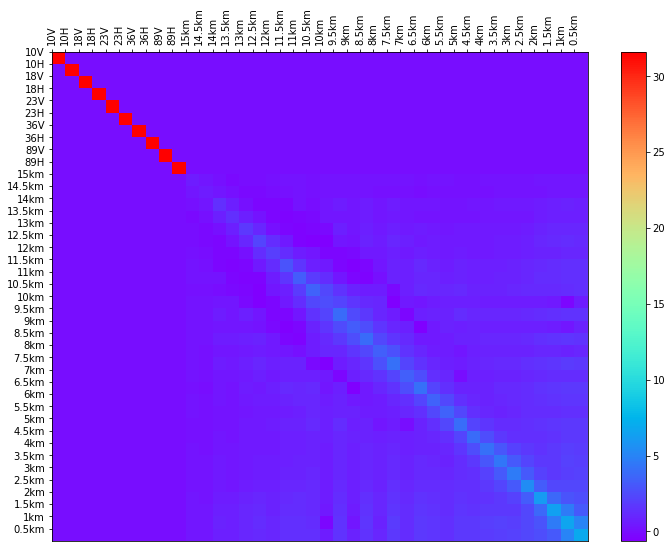

In [39]:
Sy_toplot = Sy_cloudy_radaronly


Sy_plt = np.zeros(Sy.shape)

for i in np.arange(0,Sy.shape[0]):
    for j in np.arange(0,Sy.shape[0]):
        was_neg = False
        el = Sy_toplot[i,j]
        if el < 0.:
            el = np.abs(el)
            was_neg = True
        sigma = np.sqrt(el)
        if was_neg:
            sigma = -sigma
            
        Sy_plt[i,j] = sigma
        
labels = ['10V', '10H', '18V', '18H', '23V', '23H', '36V', '36H', '89V', '89H', 
          '15km', '14.5km', '14km', '13.5km' , '13km', '12.5km', '12km', '11.5km', '11km',
          '10.5km', '10km', '9.5km', '9km', '8.5km', '8km', '7.5km', '7km', '6.5km', '6km',
          '5.5km', '5km', '4.5km', '4km', '3.5km', '3km', '2.5km', '2km', '1.5km', '1km',
         '0.5km']

fig, ax = plt.subplots(figsize=[12,9])
im = ax.pcolormesh(Sy_plt, cmap='rainbow')
ax.invert_yaxis()
ax.set_xticks(np.arange(0,Sy.shape[0]), labels, rotation=90)
ax.xaxis.tick_top()
ax.set_yticks(np.arange(0,Sy.shape[0]), labels)
plt.colorbar(im)
plt.show()

In [46]:
Sy_cloudy_radaronly[:,10]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.2985712 ,  0.14594527,  0.01515948, -0.01224003, -0.0056515 ,
       -0.0103821 ,  0.01153052,  0.04903411,  0.04327267,  0.01904619,
        0.04997014,  0.04259669,  0.03387152,  0.06496569,  0.0245362 ,
        0.03892053,  0.0245199 ,  0.00099126,  0.02391846,  0.03275437,
        0.01257061,  0.01630508,  0.02970581,  0.0327391 ,  0.0429844 ,
        0.04751796,  0.07239727,  0.1010991 ,  0.12710422,  0.07992332],
      dtype=float32)

In [47]:
#---Write out cloudy Sy radar only:

Sy_file = '/edata2/spencer/OE/amsr2_radar/OE_amsr2_radar_cloudy/sy/sy_cloudy_radaronly.mtrx'

with open(Sy_file, 'wb') as f:
    Sy_cloudy_radaronly.astype('f').T.tofile(f, sep='', format='unformatted')

In [10]:
#----------------------------------------------------
#
#   CALCULATE Sy - precipitating
#
#----------------------------------------------------

#---set latitude bounds for error covariance calculation:
lat_bound1 = -90.
lat_bound2 = -40.
lat_bound3 =  40.
lat_bound4 =  90.

indir = '/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/'

flist = glob.glob(f'{indir}/*native.bin')
flist.sort()

all_tbs = []
all_Z_e = []
all_Z_a = []

all_tbs_r = []
all_Z_e_r = []
all_Z_a_r = []

first = True

for ifile in flist:
    print(ifile)
    
    infile = ifile
    
    fdate = ifile.split('/')[-1].split('_')[3]
    fdate = np.datetime64(f'{fdate[:4]}-{fdate[4:6]}-{fdate[6:]}')
    
#     if fdate > np.datetime64('2015-01-31'):
#         break

    
    with open(infile, 'rb') as f:
        nprofs = np.fromfile(f, sep='', count=1, dtype='i')[0]
        nhgts  = np.fromfile(f, sep='', count=1, dtype='i')[0]
        nlyrs  = nhgts - 1
        lat    = np.fromfile(f, sep='', count=nprofs, dtype='f')
        lon    = np.fromfile(f, sep='', count=nprofs, dtype='f')
        height = np.fromfile(f, sep='', count=nprofs*nhgts, dtype='f').reshape(nhgts,nprofs).T
        temp   = np.fromfile(f, sep='', count=nprofs*nhgts, dtype='f').reshape(nhgts,nprofs).T
        pres   = np.fromfile(f, sep='', count=nprofs*nhgts, dtype='f').reshape(nhgts,nprofs).T
        qlyr   = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        clwc   = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        plwc   = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        tiwc   = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        sst    = np.fromfile(f, sep='', count=nprofs, dtype='f')
        t2m    = np.fromfile(f, sep='', count=nprofs, dtype='f')
        wsp    = np.fromfile(f, sep='', count=nprofs, dtype='f')
        N_0_rain = np.fromfile(f, sep='', count=nprofs, dtype='f')
        mu_rain  = np.fromfile(f, sep='', count=nprofs, dtype='f')
        N_0_snow = np.fromfile(f, sep='', count=nprofs, dtype='f')
        rho_snow = np.fromfile(f, sep='', count=nprofs, dtype='f')
        
    #---Read in simulated obs:
    obs_file = f'{infile[:-4]}_simobs.bin'
    
    with open(obs_file, 'rb') as f:
        nprofs_obs = np.fromfile(f, sep='', count=1, dtype='i')[0]
        if nprofs_obs != nprofs: #something wrong
            raise ValueError(f'Number of profiles {nprofs_obs} != {nprofs}.')
        nchans = np.fromfile(f, sep='', count=1, dtype='i')[0]
        nlyrs  = np.fromfile(f, sep='', count=1, dtype='i')[0]
        tbs    = np.fromfile(f, sep='', count=nprofs*nchans, dtype='f').reshape(nchans,nprofs).T
        Z_e    = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        Z_a    = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        
        
    #Get only raining profiles:
    prcp = []
    

    
    for iprof in np.arange(0,nprofs):

        cloud = clwc[iprof]
        rain  = plwc[iprof]
        ice   = tiwc[iprof]

        t = temp[iprof]

        z_eff = Z_e[iprof]
        
        
        
        if np.all(z_eff <= -26.): 
            continue #Don't want clear profiles
            
            
        frzlvlbin = np.where(t <= 273.15)[0][-1]
            
        if np.logical_or(np.any(rain >= 1.0e-06), np.any(z_eff[:frzlvlbin] < -15.)):
            good = True
        else:
            good = False
        
        if good:
            prcp = np.append(prcp, iprof)
        else:
            continue
        
    prcp = prcp.astype('i')
        
    #Exclude raining or clear data:
    lat         = lat[prcp]
    lon         = lon[prcp]
        
        
    #Clear memory from variables we don't need:
    height   = []
    temp     = []
    pres     = []
    qlyr     = []
    clwc     = []
    plwc     = []
    tiwc     = []
    sst      = []
    t2m      = []
    wsp      = []
    N_0_rain = []
    mu_rain  = []
    N_0_snow = []
    rho_snow = []
    
    #Exclude data from outside latitude bounds:
    within_sh_box = np.logical_and(lat >= lat_bound1, lat <= lat_bound2)
    within_nh_box = np.logical_and(lat >= lat_bound3, lat <= lat_bound4)
    in_either     = np.logical_or(within_sh_box, within_nh_box)
    within_bounds = np.where(in_either)
    
    
    lat = lat[within_bounds]
    lon = lon[within_bounds]
        
        
    tbs = tbs[prcp]
    Z_e = Z_e[prcp]
    Z_a = Z_a[prcp]
    
        
    tbs = tbs[within_bounds]
    Z_e = Z_e[within_bounds]
    Z_a = Z_a[within_bounds]
    
        
    #---Read in retrieval resolution file:
    infile_r = f'{ifile[:-10]}retr.bin'
    
    with open(infile_r, 'rb') as f:
        nprofs_r   = np.fromfile(f, sep='', count=1, dtype='i')[0]
        nhgts      = np.fromfile(f, sep='', count=1, dtype='i')[0]
        nlyrs      = nhgts - 1
        lat_r      = np.fromfile(f, sep='', count=nprofs, dtype='f')
        lon_r      = np.fromfile(f, sep='', count=nprofs, dtype='f')
        height_r   = np.fromfile(f, sep='', count=nprofs*nhgts, dtype='f').reshape(nhgts,nprofs).T
        temp_r     = np.fromfile(f, sep='', count=nprofs*nhgts, dtype='f').reshape(nhgts,nprofs).T
        pres_r     = np.fromfile(f, sep='', count=nprofs*nhgts, dtype='f').reshape(nhgts,nprofs).T
        qlyr_r     = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        clwc_r     = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        plwc_r     = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        tiwc_r     = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        sst        = np.fromfile(f, sep='', count=nprofs, dtype='f')
        t2m        = np.fromfile(f, sep='', count=nprofs, dtype='f')
        wsp        = np.fromfile(f, sep='', count=nprofs, dtype='f')
        N_0_rain_r = np.fromfile(f, sep='', count=nprofs, dtype='f')
        mu_rain    = np.fromfile(f, sep='', count=nprofs, dtype='f')
        N_0_snow_r = np.fromfile(f, sep='', count=nprofs, dtype='f')
        rho_snow_r = np.fromfile(f, sep='', count=nprofs, dtype='f')
    
        
    #Clear memory from variables we don't need:
    height_r   = []
    temp_r     = []
    pres_r     = []
    qlyr_r     = []
    clwc_r     = []
    plwc_r     = []
    tiwc_r     = []
    sst        = []
    t2m        = []
    wsp        = []
    N_0_rain_r = []
    mu_rain    = []
    N_0_snow_r = []
    rho_snow_r = []
    
    if nprofs_r != nprofs:
        raise ValueError(f'Number of profiles {nprofs_obs} != {nprofs}.')
        
    lat_r = lat_r[prcp]
    lon_r = lon_r[prcp]
        
    lat_r = lat_r[within_bounds]
    lon_r = lon_r[within_bounds]
    
    if np.any(lat_r != lat):
        raise ValueError(f'Lat arrays are not the same!')
    
    
    #---Read in retrieval resolution simulated obs:
    obs_file_r = f'{infile_r[:-4]}_simobs.bin'
    
    with open(obs_file_r, 'rb') as f:
        nprofs_obs_r = np.fromfile(f, sep='', count=1, dtype='i')[0]
        if nprofs_obs_r != nprofs: #something wrong
            raise ValueError(f'Number of profiles {nprofs_obs} != {nprofs}.')
        nchans = np.fromfile(f, sep='', count=1, dtype='i')[0]
        nlyrs  = np.fromfile(f, sep='', count=1, dtype='i')[0]
        tbs_r    = np.fromfile(f, sep='', count=nprofs*nchans, dtype='f').reshape(nchans,nprofs).T
        Z_e_r    = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        Z_a_r    = np.fromfile(f, sep='', count=nprofs*nlyrs, dtype='f').reshape(nlyrs,nprofs).T
        
    tbs_r = tbs_r[prcp]
    Z_e_r = Z_e_r[prcp]
    Z_a_r = Z_a_r[prcp]
    
    tbs_r = tbs_r[within_bounds]
    Z_e_r = Z_e_r[within_bounds]
    Z_a_r = Z_a_r[within_bounds]
    
    if first:
        all_tbs = tbs
        all_Z_e = Z_e
        all_Z_a = Z_a
        
        all_tbs_r = tbs_r
        all_Z_e_r = Z_e_r
        all_Z_a_r = Z_a_r
        
        first = False
        
    else:
        all_tbs = np.concatenate((all_tbs, tbs), axis=0)
        all_Z_e = np.concatenate((all_Z_e, Z_e), axis=0)
        all_Z_a = np.concatenate((all_Z_a, Z_a), axis=0)
    
        all_tbs_r = np.concatenate((all_tbs_r, tbs_r), axis=0)
        all_Z_e_r = np.concatenate((all_Z_e_r, Z_e_r), axis=0)
        all_Z_a_r = np.concatenate((all_Z_a_r, Z_a_r), axis=0)
        

    
ntotprofs = all_tbs.shape[0]
simobs   = np.zeros([ntotprofs, nchans+nlyrs], dtype='f')
simobs_r = np.zeros([ntotprofs, nchans+nlyrs], dtype='f')
simobs[:,:nchans]   = all_tbs
simobs[:,nchans:]   = all_Z_a
simobs_r[:,:nchans] = all_tbs_r
simobs_r[:,nchans:] = all_Z_a_r

print('Total profiles in statistics: ', ntotprofs)

#Remove nans:
#Check native first
bad_obs  = np.where(np.isnan(simobs))[0]
simobs   = np.delete(simobs, bad_obs, axis=0)
simobs_r = np.delete(simobs_r, bad_obs, axis=0)
#lat      = np.delete(lat, bad_obs)

print('number of bad obs, native: ', bad_obs.size)

bad_obs  = np.where(np.isnan(simobs_r))[0]
simobs   = np.delete(simobs, bad_obs, axis=0)
simobs_r = np.delete(simobs_r, bad_obs, axis=0)
#lat      = np.delete(lat, bad_obs)

print('number of bad obs, retr: ', bad_obs.size)

obs_error = simobs_r - simobs

Sy = np.cov(obs_error, rowvar=False)

#---Add NEDT (K) to diagonal elements of Sy:
Sy[0,0] = Sy[0,0] + 0.6    #10V
Sy[1,1] = Sy[1,1] + 0.6    #10H
Sy[2,2] = Sy[2,2] + 0.6    #18V
Sy[3,3] = Sy[3,3] + 0.6    #18H
Sy[4,4] = Sy[4,4] + 0.6    #23V
Sy[5,5] = Sy[5,5] + 0.6    #23H
Sy[6,6] = Sy[6,6] + 0.6    #36V
Sy[7,7] = Sy[7,7] + 0.6    #36H
Sy[8,8] = Sy[8,8] + 1.1    #89V
Sy[9,9] = Sy[9,9] + 1.1    #89H

/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150101_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150103_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150104_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150105_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150106_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150107_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150108_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150109_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150110_native.bin
/edata2/spencer/the

/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150717_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150718_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150719_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150720_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150721_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150722_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150723_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150724_native.bin
/edata2/spencer/thesis_data/era5_ocean_profiles/err_covar_amsr2_csat/era5_ocean_profiles_20150725_native.bin
/edata2/spencer/the

In [11]:
Sy_prcp = Sy.copy()

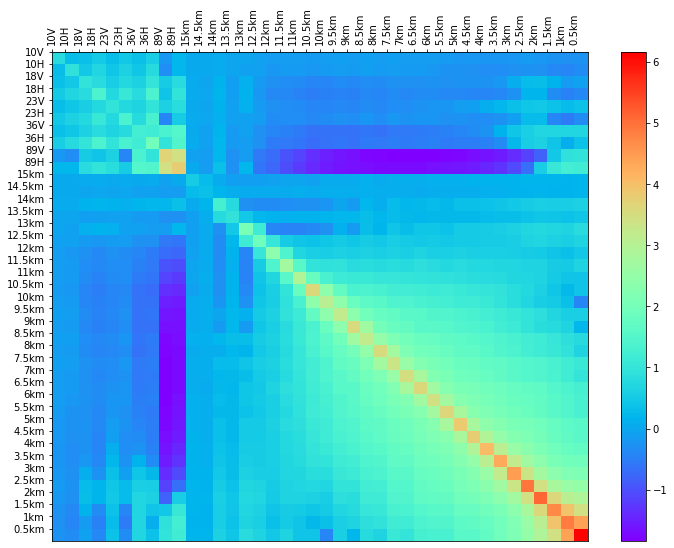

In [12]:
#---Plot using the signed square root of variances:
Sy_plt = np.zeros(Sy.shape)

for i in np.arange(0,Sy.shape[0]):
    for j in np.arange(0,Sy.shape[0]):
        was_neg = False
        el = Sy_prcp[i,j]
        if el < 0.:
            el = np.abs(el)
            was_neg = True
        sigma = np.sqrt(el)
        if was_neg:
            sigma = -sigma
            
        Sy_plt[i,j] = sigma
        
labels = ['10V', '10H', '18V', '18H', '23V', '23H', '36V', '36H', '89V', '89H', 
          '15km', '14.5km', '14km', '13.5km' , '13km', '12.5km', '12km', '11.5km', '11km',
          '10.5km', '10km', '9.5km', '9km', '8.5km', '8km', '7.5km', '7km', '6.5km', '6km',
          '5.5km', '5km', '4.5km', '4km', '3.5km', '3km', '2.5km', '2km', '1.5km', '1km',
         '0.5km']

fig, ax = plt.subplots(figsize=[12,9])
im = ax.pcolormesh(Sy_plt, cmap='rainbow')
ax.invert_yaxis()
ax.set_xticks(np.arange(0,Sy.shape[0]), labels, rotation=90)
ax.xaxis.tick_top()
ax.set_yticks(np.arange(0,Sy.shape[0]), labels)
plt.colorbar(im)
plt.show()

In [13]:
#---Write out prcp Sy:

Sy_file = '/edata2/spencer/OE/amsr2_radar/OE_amsr2_radar_prcp/sy/sy_prcp.mtrx'

with open(Sy_file, 'wb') as f:
    Sy_prcp.astype('f').T.tofile(f, sep='', format='unformatted')

In [14]:
#---Create Sy_prcp with no radar:

Sy_prcp_noradar = Sy_prcp.copy()

for i in np.arange(0, Sy.shape[0]):
    for j in np.arange(0, Sy.shape[0]):
        if i >= 10 or j >= 10:
            if i == j:
                Sy_prcp_noradar[i,j] = 1000.
            else:
                Sy_prcp_noradar[i,j] = 0.

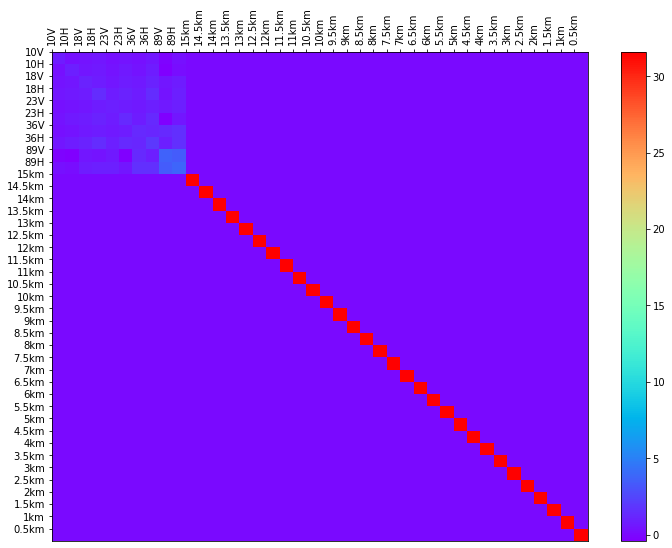

In [15]:
Sy_plt = np.zeros(Sy.shape)

for i in np.arange(0,Sy.shape[0]):
    for j in np.arange(0,Sy.shape[0]):
        was_neg = False
        el = Sy_prcp_noradar[i,j]
        if el < 0.:
            el = np.abs(el)
            was_neg = True
        sigma = np.sqrt(el)
        if was_neg:
            sigma = -sigma
            
        Sy_plt[i,j] = sigma
        
labels = ['10V', '10H', '18V', '18H', '23V', '23H', '36V', '36H', '89V', '89H', 
          '15km', '14.5km', '14km', '13.5km' , '13km', '12.5km', '12km', '11.5km', '11km',
          '10.5km', '10km', '9.5km', '9km', '8.5km', '8km', '7.5km', '7km', '6.5km', '6km',
          '5.5km', '5km', '4.5km', '4km', '3.5km', '3km', '2.5km', '2km', '1.5km', '1km',
         '0.5km']

fig, ax = plt.subplots(figsize=[12,9])
im = ax.pcolormesh(Sy_plt, cmap='rainbow')
ax.invert_yaxis()
ax.set_xticks(np.arange(0,Sy.shape[0]), labels, rotation=90)
ax.xaxis.tick_top()
ax.set_yticks(np.arange(0,Sy.shape[0]), labels)
plt.colorbar(im)
plt.show()

In [16]:
#---Write out prcp Sy with no radar:

Sy_file = '/edata2/spencer/OE/amsr2_radar/OE_amsr2_radar_prcp/sy/sy_prcp_noradar.mtrx'

with open(Sy_file, 'wb') as f:
    Sy_prcp_noradar.astype('f').T.tofile(f, sep='', format='unformatted')

In [48]:
#---Create prcp Sy with radar only:


#---Read in file to edit if need be:
#!Just remember to write back out in Fortran order :)
Sy_file = '/edata2/spencer/OE/amsr2_radar/OE_amsr2_radar_prcp/sy/sy_prcp.mtrx'

nobs = 40

with open(Sy_file) as f:
    Sy = np.fromfile(f, sep='', count=nobs*nobs, dtype='f').reshape(nobs,nobs).T
    
    
Sy_prcp = Sy.copy()

#---Create Sy_prcp with radar only:

Sy_prcp_radaronly = Sy_prcp.copy()

Sy_prcp_radaronly[0:10,:] = 0.
Sy_prcp_radaronly[:,0:10] = 0.

for i in np.arange(0, 10):
    Sy_prcp_radaronly[i,i] = 1000.

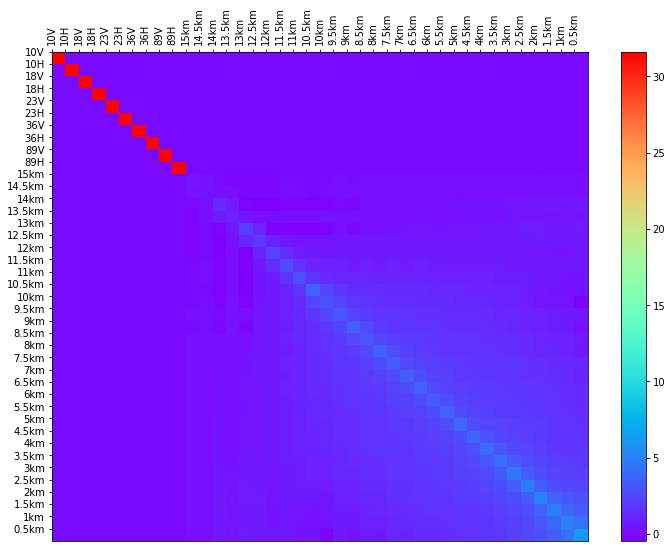

In [49]:
Sy_toplot = Sy_prcp_radaronly


Sy_plt = np.zeros(Sy.shape)

for i in np.arange(0,Sy.shape[0]):
    for j in np.arange(0,Sy.shape[0]):
        was_neg = False
        el = Sy_toplot[i,j]
        if el < 0.:
            el = np.abs(el)
            was_neg = True
        sigma = np.sqrt(el)
        if was_neg:
            sigma = -sigma
            
        Sy_plt[i,j] = sigma
        
labels = ['10V', '10H', '18V', '18H', '23V', '23H', '36V', '36H', '89V', '89H', 
          '15km', '14.5km', '14km', '13.5km' , '13km', '12.5km', '12km', '11.5km', '11km',
          '10.5km', '10km', '9.5km', '9km', '8.5km', '8km', '7.5km', '7km', '6.5km', '6km',
          '5.5km', '5km', '4.5km', '4km', '3.5km', '3km', '2.5km', '2km', '1.5km', '1km',
         '0.5km']

fig, ax = plt.subplots(figsize=[12,9])
im = ax.pcolormesh(Sy_plt, cmap='rainbow')
ax.invert_yaxis()
ax.set_xticks(np.arange(0,Sy.shape[0]), labels, rotation=90)
ax.xaxis.tick_top()
ax.set_yticks(np.arange(0,Sy.shape[0]), labels)
plt.colorbar(im)
plt.show()

In [50]:
#---Write out prcp Sy radar only:

Sy_file = '/edata2/spencer/OE/amsr2_radar/OE_amsr2_radar_prcp/sy/sy_prcp_radaronly.mtrx'

with open(Sy_file, 'wb') as f:
    Sy_prcp_radaronly.astype('f').T.tofile(f, sep='', format='unformatted')

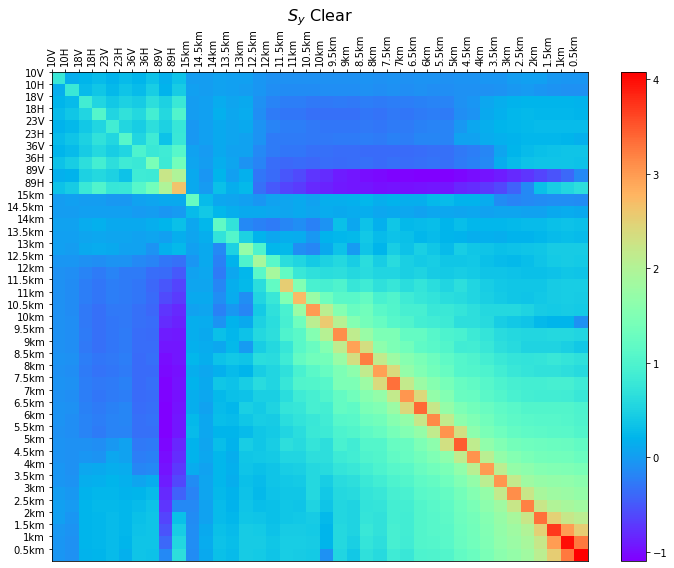

In [17]:
#------------------------------------------------
#
#   Just read in and plot
#
#-------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

Sy_file = '/edata2/spencer/OE/amsr2_radar/OE_amsr2_radar_prcp/sy/sy_clear.mtrx'

nobs = 40

with open(Sy_file, 'rb') as f:
    Sy_toplot = np.fromfile(f, sep='', count=-1, dtype='f').reshape(nobs,nobs)
    

Sy_plt = np.zeros(Sy_toplot.shape)

for i in np.arange(0,nobs):
    for j in np.arange(0,nobs):
        was_neg = False
        el = Sy_toplot[i,j]
        if el < 0.:
            el = np.abs(el)
            was_neg = True
        sigma = np.sqrt(el)
        if was_neg:
            sigma = -sigma
            
        Sy_plt[i,j] = sigma
        
labels = ['10V', '10H', '18V', '18H', '23V', '23H', '36V', '36H', '89V', '89H', 
          '15km', '14.5km', '14km', '13.5km' , '13km', '12.5km', '12km', '11.5km', '11km',
          '10.5km', '10km', '9.5km', '9km', '8.5km', '8km', '7.5km', '7km', '6.5km', '6km',
          '5.5km', '5km', '4.5km', '4km', '3.5km', '3km', '2.5km', '2km', '1.5km', '1km',
         '0.5km']

fig, ax = plt.subplots(figsize=[12,9])
im = ax.pcolormesh(Sy_plt, cmap='rainbow')
ax.invert_yaxis()
ax.set_xticks(np.arange(0,nobs), labels, rotation=90)
ax.xaxis.tick_top()
ax.set_yticks(np.arange(0,nobs), labels)
plt.colorbar(im)
plt.title(r'$S_y$ Clear ', fontsize=16)
plt.show()

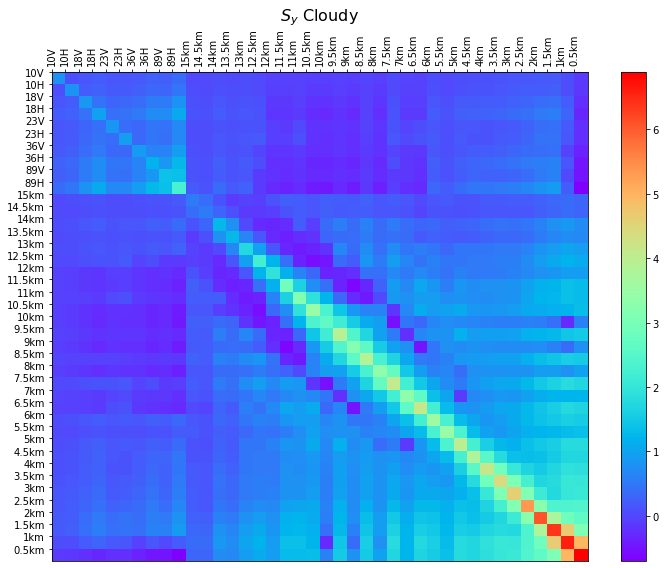

In [19]:
Sy_file = '/edata2/spencer/OE/amsr2_radar/OE_amsr2_radar_prcp/sy/sy_cloudy.mtrx'

nobs = 40

with open(Sy_file, 'rb') as f:
    Sy_toplot = np.fromfile(f, sep='', count=-1, dtype='f').reshape(nobs,nobs)
    

Sy_plt = np.zeros(Sy_toplot.shape)

for i in np.arange(0,nobs):
    for j in np.arange(0,nobs):
        was_neg = False
        el = Sy_toplot[i,j]
        if el < 0.:
            el = np.abs(el)
            was_neg = True
        sigma = np.sqrt(el)
        if was_neg:
            sigma = -sigma
            
        Sy_plt[i,j] = sigma
        
labels = ['10V', '10H', '18V', '18H', '23V', '23H', '36V', '36H', '89V', '89H', 
          '15km', '14.5km', '14km', '13.5km' , '13km', '12.5km', '12km', '11.5km', '11km',
          '10.5km', '10km', '9.5km', '9km', '8.5km', '8km', '7.5km', '7km', '6.5km', '6km',
          '5.5km', '5km', '4.5km', '4km', '3.5km', '3km', '2.5km', '2km', '1.5km', '1km',
         '0.5km']

fig, ax = plt.subplots(figsize=[12,9])
im = ax.pcolormesh(Sy_plt, cmap='rainbow')
ax.invert_yaxis()
ax.set_xticks(np.arange(0,nobs), labels, rotation=90)
ax.xaxis.tick_top()
ax.set_yticks(np.arange(0,nobs), labels)
plt.colorbar(im)
plt.title(r'$S_y$ Cloudy ', fontsize=16)
plt.show()

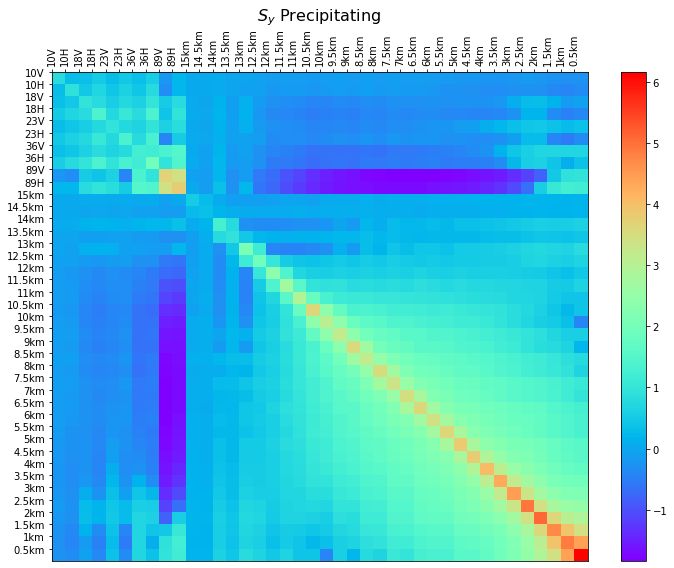

In [20]:
Sy_file = '/edata2/spencer/OE/amsr2_radar/OE_amsr2_radar_prcp/sy/sy_prcp.mtrx'

nobs = 40

with open(Sy_file, 'rb') as f:
    Sy_toplot = np.fromfile(f, sep='', count=-1, dtype='f').reshape(nobs,nobs)
    

Sy_plt = np.zeros(Sy_toplot.shape)

for i in np.arange(0,nobs):
    for j in np.arange(0,nobs):
        was_neg = False
        el = Sy_toplot[i,j]
        if el < 0.:
            el = np.abs(el)
            was_neg = True
        sigma = np.sqrt(el)
        if was_neg:
            sigma = -sigma
            
        Sy_plt[i,j] = sigma
        
labels = ['10V', '10H', '18V', '18H', '23V', '23H', '36V', '36H', '89V', '89H', 
          '15km', '14.5km', '14km', '13.5km' , '13km', '12.5km', '12km', '11.5km', '11km',
          '10.5km', '10km', '9.5km', '9km', '8.5km', '8km', '7.5km', '7km', '6.5km', '6km',
          '5.5km', '5km', '4.5km', '4km', '3.5km', '3km', '2.5km', '2km', '1.5km', '1km',
         '0.5km']

fig, ax = plt.subplots(figsize=[12,9])
im = ax.pcolormesh(Sy_plt, cmap='rainbow')
ax.invert_yaxis()
ax.set_xticks(np.arange(0,nobs), labels, rotation=90)
ax.xaxis.tick_top()
ax.set_yticks(np.arange(0,nobs), labels)
plt.colorbar(im)
plt.title(r'$S_y$ Precipitating ', fontsize=16)
plt.show()